In [1]:
from Function.SNNModule import *
from Function.SNN_230404 import SNNModel
from Function.plot_SNN import *
from Function.ReceptiveField_GPU import *
from Function.Stimulation_GPU import *
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import scipy.io
import time
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
print("GPU available:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)

# Enable GPU support if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = "cpu"
print(device)

GPU available: True
CUDA version: 10.1
cpu


In [3]:
pixel_h, pixel_w = 3, 1  # (#)

In [4]:
receptive_field_optimized = [torch.tensor([[10, 10, 10]])]

synaptic_delays_top = [torch.tensor([[0, 0, 0]], device=device)]

rf, rf_length = generate_afferent_to_top_rf(receptive_field_optimized, pixel_h=1,
                                                      pixel_w=3, step_size=1, device=device)

rf_delay, rf_delay_length = generate_afferent_to_top_rf(synaptic_delays_top, pixel_h=1,
                                                                      pixel_w=3, step_size=1, device=device)


print(rf)
print(rf_delay)

Complete! Generated 1 receptive fields from afferents to the top with kernel size 1x3. with step size 0x0
Complete! Generated 1 receptive fields from afferents to the top with kernel size 1x3. with step size 0x0
tensor([[10., 10., 10.]])
tensor([[0., 0., 0.]])


In [5]:
# Create Izhikevich layers
layers = [
    IzhikevichLayer(0.02, 0.2, -65, 8, 1 , a_decay=1 ,device=device),
    ]

# Create synapses
synapses = [
    Synapse(rf,rf_delay,device = device),
    ]

layers initialized
Synapses initialized


In [6]:
print(layers[0].v)

tensor([-65.])


In [7]:
def run_simulation(layers, synapses, stim, device='cpu'):
    S = SNNModel(layers,synapses,device)    

    spike_times = S.feedforward(stim)

    plot_spike_times(stim.reshape(3,-1),'orange',size = (10,5),xtick = np.arange(0, 21, 1))
    plot_spike_times(S.spike_times[0],'k',size = (10,5),xtick = np.arange(0, 21, 1))
    return(S)



tensor([[[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 1.]],

        [[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 1.]],

        [[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 1.]]])
Initializing SNN Model with 1 layers with device cpu
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 1])
torch.Size([3, 1])


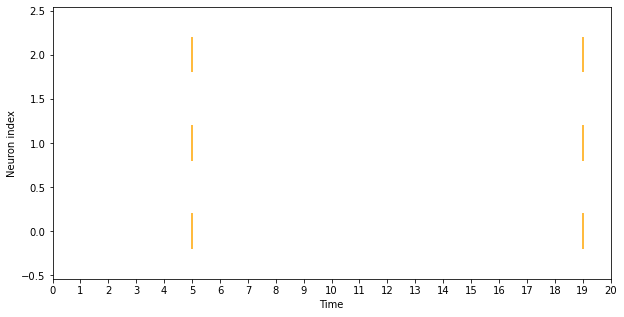

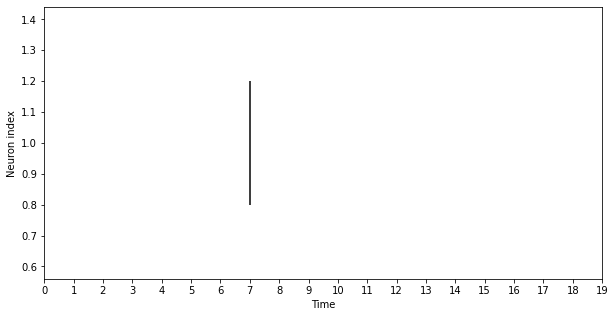

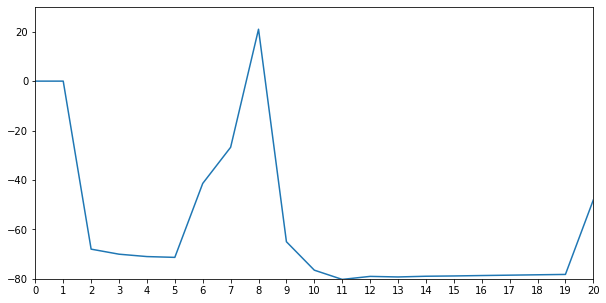

In [8]:
num_stim = 20
zeros_tensor = torch.zeros(3, 1, num_stim)
stim = zeros_tensor

# stim[1,0,1] = 1
stim[:,0,5] = 1
# stim[:,0,10] = 1
stim[:,0,19] = 1
print(stim)

S = run_simulation(layers, synapses, stim, device=device)

plt.figure(figsize=(10, 5))
plt.plot(S.v)
plt.xlim(0, 20)
plt.ylim(-80,30)
plt.xticks(np.arange(0, 21, 1))
plt.show()